Ahmed Abdo Amin Abdo \
Ahmed Abd Ellatife Mohamed Salah Eldine \
Alaa Tohamy Mohamed AbdElwahab \
Sherif Mohamed Abdelaziz Ahmed \

##1- Fiction | Poetry | Mystery | Drama | Children
1- "austen-emma.txt", \
2- "milton-paradise.txt", \
3- "chesterton-brown.txt", \
4- "shakespeare-caesar.txt", \
5- "carroll-alice.txt"

In [1]:
import nltk
import pandas as pd
import re
import numpy as np
nltk.download("gutenberg")
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,5)
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import Word2Vec
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import cohen_kappa_score
from sklearn. preprocessing import StandardScaler
from sklearn. cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
names = ["austen-emma.txt", "milton-paradise.txt", "chesterton-brown.txt", "shakespeare-caesar.txt", "carroll-alice.txt"]
Authors = ['Jane Austen','John Milton' ,'G.K.Chesterton','William Shakespeare','Lewis Carroll']
genere = ['Fiction','Poetry' ,'Mystery','Drama','Children']

##Preprocessing and Cleaning data

In [4]:
library = []
for i in names:
  book = list(nltk.corpus.gutenberg.words(i))
  for w in range(len(book)):
    book[w] = ''.join(re.findall("[A-Za-z]", book[w]))
  tmp = []
  for w in range(len(book)):
    if book[w]!='':
      tmp.append(book[w])
  book = tmp
  library.append(book)
# book

In [5]:
c=stopwords.words('english')
new_library = []
for book in library:
  newbook=[]
  for i in book:
    if i not in c:
      newbook.append(i)
  new_library.append(newbook)
library = new_library

Lemtization

In [6]:
lem = WordNetLemmatizer()
lem0=[]
lem1=[]
lem2=[]
lem3=[]
lem4=[]

for words in library[0] :
    lem0.append(lem.lemmatize(words))
for words in library[1] :
    lem1.append(lem.lemmatize(words))
for words in library[2] :
    lem2.append(lem.lemmatize(words))
for words in library[3] :
    lem3.append(lem.lemmatize(words))
for words in library[4] :
    lem4.append(lem.lemmatize(words))

library=[lem0,lem1,lem2,lem3,lem4]

In [7]:
split_lists=[]
import random
for i in library:
  temp = []
  for x in range(200):
    ind = random.randint(0,len(i)-151)
    # temp.append(i[ind:ind+150])
    temp.append(' '.join(i[ind:ind+150]).lower())
  split_lists = split_lists + temp
len(split_lists[0].split())

150

In [8]:
titles=[] 
for name in names:
  for i in range(200):
    titles.append(name[:-4])

In [13]:
Author=[]
for a in Authors:
  for l in range(200):
    Author.append(a)

In [14]:
generes=[] 
for i in range(5):
  for j in range(200):
    generes.append(genere[i])

In [15]:
mydataset= pd.DataFrame()
mydataset['The sentences']=split_lists
mydataset['Author Name']= Author
mydataset['Genere']=generes
mydataset['Actual Code']= titles

In [16]:
label_encoder = LabelEncoder()
mydataset['Actual Code'] = label_encoder.fit_transform(mydataset['Actual Code'])
#display(mydataset.sample(len(mydataset)))
mydataset
# len(mydataset['The sentences'][1])

,The sentences,Author Name,Genere,Actual Code
0,slavery well sir time must come paid little la...,Jane Austen,Fiction,0
1,tried shrubbery every place every posture perc...,Jane Austen,Fiction,0
2,mr weston really kind papa speak melancholy wa...,Jane Austen,Fiction,0
3,danger without trying preserve it duty pray em...,Jane Austen,Fiction,0
4,fair frozen maid kindled flame i yet deplore t...,Jane Austen,Fiction,0
...,...,...,...,...
995,turtle crumb would wash sea but have tail mout...,Lewis Carroll,Children,1
996,first minute two much could hold as soon made ...,Lewis Carroll,Children,1
997,how neatly spread claw and welcome little fish...,Lewis Carroll,Children,1
998,angrily really dull you ought ashamed asking s...,Lewis Carroll,Children,1


In [ ]:
lbl = LabelEncoder()
mydataset['Actual Code'] = lbl.fit_transform(mydataset['Actual Code'])
y = mydataset['Actual Code'].to_numpy()
# remove dubplication of Author Name column
lst = mydataset['Actual Code'].drop_duplicates()
# convert it into one-dimensional array
lst_namesOfBook = list(np.array(lst.values.tolist()).reshape(-1))
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
allSentences = mydataset['The sentences']
allSentences = list(allSentences)

##Feature Engineering

In [ ]:
def DrawDataTransform(X_vec, nameTitle):
  X_embedded = TSNE(n_components=2, learning_rate=1000, init='random').fit_transform(X_vec)
  sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=mydataset["Actual Code"],
                data=mydataset ).set(title=nameTitle)

###Feature extraction

####BOW

,if,love,might,simple,single,successless,side,alone,she,unconsciously,...,hearthrug,shutting,label,poker,bleeds,custard,roast,toffee,buttered,toast
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


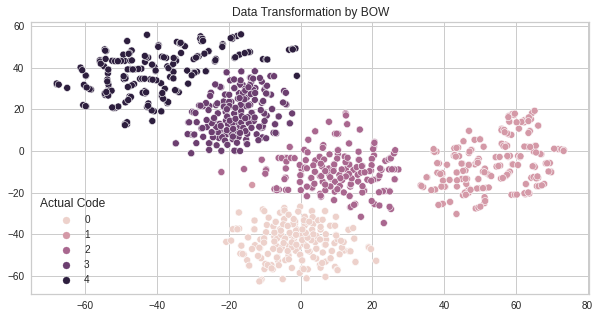

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2)
X_BOW = vectorizer.fit(allSentences)
X_features_BOW = X_BOW.vocabulary_
X_features_BOW1 = X_BOW.get_feature_names()
X_BOW = vectorizer.transform(allSentences)
X_BOW = list(X_BOW.toarray())
X_BOW = np.array(X_BOW)
display(pd.DataFrame(X_BOW, columns=X_features_BOW))
'''for i in range(len(allSentences)):
  print(X_BOW[i])'''
DrawDataTransform(X_BOW, "Data Transformation by BOW")

####TFiDF

<class 'scipy.sparse.csr.csr_matrix'>
The new Shape for X_TFiDF_Vec is (1000, 12198)
the features of X_TFiDF_Vec are: {'if': 5385, 'love': 6415, 'might': 6738, 'simple': 9624, 'single': 9641, 'successless': 10347, 'side': 9592, 'alone': 325, 'she': 9471, 'unconsciously': 11214, 'sucking': 10351, 'sad': 9090, 'poison': 7942, 'sharer': 9460, 'conversation': 2275, 'friend': 4447, 'best': 1064, 'purest': 8345, 'motif': 6907, 'denying': 2772, 'visit': 11623, 'ireland': 5848, 'resolving': 8842, 'divide': 3141, 'effectually': 3421, 'connexion': 2156, 'soon': 9864, 'beginning': 991, 'career': 1540, 'laborious': 6070, 'duty': 3343, 'upon': 11437, 'whole': 11932, 'emma': 3500, 'left': 6200, 'softened': 9813, 'charitable': 1681, 'feeling': 4085, 'made': 6487, 'look': 6373, 'around': 589, 'walking': 11736, 'home': 5228, 'lament': 6095, 'highbury': 5177, 'afforded': 217, 'young': 12180, 'man': 6530, 'worthy': 12089, 'giving': 4647, 'independence': 5556, 'nobody': 7149, 'could': 2345, 'wish': 12006,

,if,love,might,simple,single,successless,side,alone,she,unconsciously,...,toffee,buttered,toast,flurry,eats,tears,curiouser,largest,carrier,dinn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


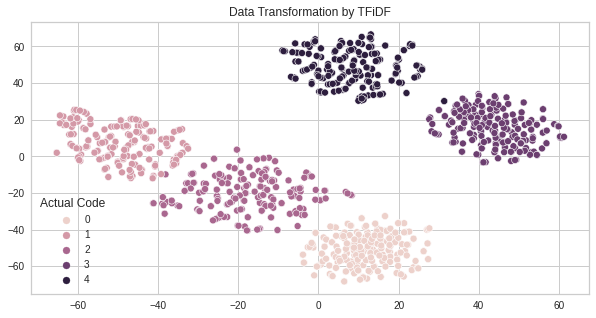

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
VecModel_TFiDF = TfidfVectorizer()
X_TFiDF_Vec = VecModel_TFiDF.fit(allSentences)
X_TFiDF_features = X_TFiDF_Vec.vocabulary_
X_TFiDF_features1 =X_TFiDF_Vec.get_feature_names()
X_TFiDF_Vec = VecModel_TFiDF.transform(allSentences)
print(type(X_TFiDF_Vec))
X_TFiDF_Vec = pd.DataFrame.sparse.from_spmatrix(X_TFiDF_Vec,columns=X_TFiDF_features)
print(f'The new Shape for X_TFiDF_Vec is {X_TFiDF_Vec.shape}')
print(f'the features of X_TFiDF_Vec are: {X_TFiDF_features}')
df_TFiDF = X_TFiDF_Vec
display(X_TFiDF_Vec)
X_TFiDF_Vec = X_TFiDF_Vec.to_numpy()
DrawDataTransform(X_TFiDF_Vec, 'Data Transformation by TFiDF')

In [ ]:
# Display 
for i in range(5):
  print(sorted(list(df_TFiDF.iloc[i,:]), reverse = True)[:20])

[0.19435147889308196, 0.19164005254286498, 0.16951047507297934, 0.15286075139385102, 0.11535929210677652, 0.1125928042778667, 0.11259210069391148, 0.11259210069391148, 0.1109840475981169, 0.1109840475981169, 0.1109840475981169, 0.1109840475981169, 0.1109840475981169, 0.1109840475981169, 0.1109840475981169, 0.1109840475981169, 0.1109840475981169, 0.1109840475981169, 0.1109840475981169, 0.1109840475981169]
[0.1945415468106849, 0.19182746879471751, 0.16967624948947724, 0.15301024305126532, 0.1154721088476203, 0.11270291550505186, 0.11270221123301989, 0.11270221123301989, 0.11109258552607228, 0.11109258552607228, 0.11109258552607228, 0.11109258552607228, 0.11109258552607228, 0.11109258552607228, 0.11109258552607228, 0.11109258552607228, 0.11109258552607228, 0.11109258552607228, 0.11109258552607228, 0.11109258552607228]
[0.31110070460245487, 0.17176290368516692, 0.1683555927996035, 0.14940914687027285, 0.14150318261941433, 0.1314533489831915, 0.13119410209191756, 0.12651058532578183, 0.1260

###Feature Selection

In [ ]:
print("Before features reduction")
print(f'BOW : {X_BOW.shape}')
print(f'TFiDF : {X_TFiDF_Vec.shape}')
fS_BOW = SelectPercentile(score_func= chi2, percentile=10)
fS_TFiDF = SelectPercentile(score_func= chi2, percentile=10)
X_BOW = fS_BOW.fit_transform(X_BOW,y)
X_TFiDF_Vec = fS_TFiDF.fit_transform(X_TFiDF_Vec,y)
print("After features reduction")
print(f'BOW : {X_BOW.shape}')
print(f'TFiDF : {X_TFiDF_Vec.shape}')

Before features reduction
BOW : (1000, 8475)
TFiDF : (1000, 12198)
After features reduction
BOW : (1000, 847)
TFiDF : (1000, 1220)


###LDA (LatentDirichletAllocation) With BOW

In [ ]:
LDA = LatentDirichletAllocation(n_components= 5, random_state= 42)
LDA.fit(X_BOW)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
len(LDA.components_), len(LDA.components_[0])

(5, 847)

In [ ]:
for index, topic in enumerate(LDA.components_):
  print(f"THE TOP 10 WORDS FOR TOPIC #{index}")
  print([X_features_BOW1[i] for i in topic.argsort()[-10:]])
  print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['ballroom', 'aristocrat', 'augmentation', 'ambrosia', 'asleep', 'appear', 'belong', 'artemidorus', 'actress', 'barred']


THE TOP 10 WORDS FOR TOPIC #1
['beak', 'bereaved', 'appetite', 'belong', 'belonged', 'berlin', 'beneath', 'bestowed', 'absent', 'audible']


THE TOP 10 WORDS FOR TOPIC #2
['bestowed', 'affair', 'admiration', 'beak', 'beneath', 'actually', 'appealed', 'adam', 'adder', 'absent']


THE TOP 10 WORDS FOR TOPIC #3
['benevolence', 'boat', 'artemidorus', 'bleeding', 'arrangement', 'augmentation', 'belong', 'arthur', 'about', 'barred']


THE TOP 10 WORDS FOR TOPIC #4
['benches', 'assurance', 'apologetic', 'bear', 'atrophy', 'atheist', 'affecting', 'allow', 'boat', 'ate']




In [ ]:
X_LDA_Vec_BOW = LDA.transform(X_BOW)
X_LDA_Vec_BOW.shape

(1000, 5)

In [ ]:
X_LDA_Vec_BOW[0].round(2)

array([0.  , 0.  , 0.  , 0.06, 0.93])

The new Shape for X_LDA_Vec is (1000, 5)


,0,1,2,3,4
0,0.003542,0.003589,0.003533,0.055668,0.933667
1,0.003483,0.003525,0.003470,0.056636,0.932886
2,0.002431,0.002417,0.002408,0.002418,0.990326
3,0.002814,0.002818,0.002782,0.002807,0.988779
4,0.002778,0.002796,0.002765,0.002777,0.988883
...,...,...,...,...,...
995,0.002189,0.002191,0.002165,0.991281,0.002174
996,0.002300,0.002299,0.002284,0.855885,0.137231
997,0.002187,0.002174,0.002172,0.991289,0.002178
998,0.002935,0.002893,0.002873,0.988383,0.002916


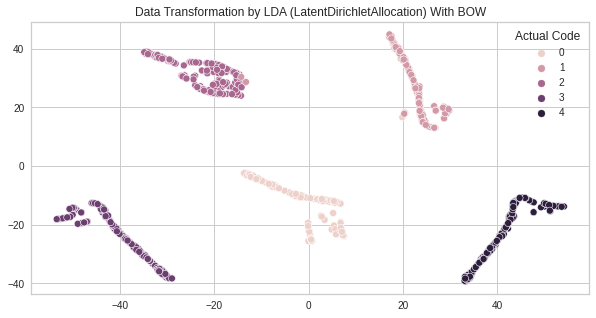

In [ ]:
X_LDA_Vec_BOW = pd.DataFrame(X_LDA_Vec_BOW)
print(f'The new Shape for X_LDA_Vec is {X_LDA_Vec_BOW.shape}')
#print(f'the features of X_LDA_Vec are: {X_features_BOW1}')
df_LDA = X_LDA_Vec_BOW
display(X_LDA_Vec_BOW)
X_LDA_Vec_BOW = X_LDA_Vec_BOW.to_numpy()
DrawDataTransform(X_LDA_Vec_BOW, 'Data Transformation by LDA (LatentDirichletAllocation) With BOW')
#plt.scatter(X_LDA_Vec[:,0], X_LDA_Vec[:,1])

In [ ]:
y_true = []
for i in range(0,len(X_LDA_Vec_BOW)):
  y_true.append(X_LDA_Vec_BOW[i].argmax(axis=0))

In [ ]:
y_Actual_LDA_Vec_BOW = y_true

###LDA (LatentDirichletAllocation) With TFiDF

In [ ]:
LDA_TFiDF = LatentDirichletAllocation(n_components= 5, random_state= 42)
LDA_TFiDF.fit(X_TFiDF_Vec)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
len(LDA_TFiDF.components_), len(LDA_TFiDF.components_[0])
#single_topic = LDA_TFiDF.components_[0]
#single_topic.argsort()

(5, 1220)

In [ ]:
for index, topic in enumerate(LDA.components_):
  print(f"THE TOP 10 WORDS FOR TOPIC #{index}")
  print([X_TFiDF_features1[i] for i in topic.argsort()[-10:]])
  print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['arrange', 'and', 'apt', 'agreeably', 'anxious', 'am', 'athletic', 'another', 'accursed', 'articulation']


THE TOP 10 WORDS FOR TOPIC #1
['aside', 'attained', 'amazing', 'athletic', 'athwart', 'attaines', 'attach', 'attended', 'abraham', 'appropriated']


THE TOP 10 WORDS FOR TOPIC #2
['attended', 'ades', 'acrid', 'aside', 'attach', 'accusation', 'always', 'accused', 'achievement', 'abraham']


THE TOP 10 WORDS FOR TOPIC #3
['attachment', 'backward', 'another', 'averting', 'animating', 'apt', 'athletic', 'answer', 'abolished', 'articulation']


THE TOP 10 WORDS FOR TOPIC #4
['atrocious', 'apparently', 'altered', 'aske', 'appetence', 'appeased', 'adjudged', 'afforded', 'backward', 'appease']




In [ ]:
X_LDA_Vec_TFiDF = LDA_TFiDF.transform(X_TFiDF_Vec)
X_LDA_Vec_TFiDF.shape

(1000, 5)

In [ ]:
X_LDA_Vec_TFiDF[0].round(2)

array([0.04, 0.04, 0.04, 0.05, 0.82])

The new Shape for X_LDA_Vec is (1000, 5)
the features of X_LDA_Vec are: ['abashed', 'abassin', 'abbana', 'abbey', 'abdiel', 'abhor', 'abhorred', 'abhorrest', 'abide', 'abides', 'ability', 'abject', 'able', 'abler', 'abode', 'abolish', 'abolished', 'abolition', 'abominable', 'abortive', 'aboue', 'about', 'above', 'abraham', 'abridg', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absently', 'absentmindedly', 'absents', 'absinthe', 'absolute', 'absolutely', 'absorbed', 'absorption', 'abstain', 'abstained', 'abstemious', 'abstracted', 'abstrusest', 'absurd', 'absurdly', 'abundance', 'abundantly', 'abuse', 'abusing', 'abyss', 'accaron', 'acceded', 'accent', 'accents', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accessible', 'accession', 'accessory', 'accident', 'accidental', 'accidentall', 'accidentally', 'acclaim', 'accommodation', 'accompanied', 'accompany', 'accompanying', 'accomplish', 'accomplished', 'accomplishment', 'accord', 'accordance', 'accor

,0,1,2,3,4
0,0.044454,0.043483,0.043477,0.047439,0.821146
1,0.045547,0.044585,0.044571,0.048912,0.816384
2,0.040325,0.040134,0.039731,0.039949,0.839860
3,0.039989,0.040180,0.039018,0.039222,0.841591
4,0.045303,0.045220,0.045121,0.045048,0.819308
...,...,...,...,...,...
995,0.040712,0.837999,0.040186,0.040472,0.040629
996,0.039431,0.833034,0.038857,0.039625,0.049053
997,0.045067,0.819595,0.044744,0.045301,0.045293
998,0.039947,0.838737,0.039582,0.040888,0.040845


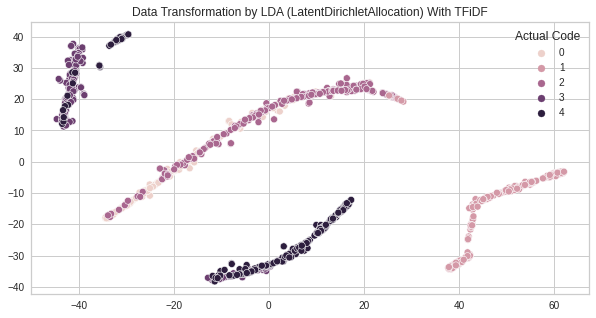

In [ ]:
X_LDA_Vec_TFiDF = pd.DataFrame(X_LDA_Vec_TFiDF)
print(f'The new Shape for X_LDA_Vec is {X_LDA_Vec_TFiDF.shape}')
print(f'the features of X_LDA_Vec are: {X_TFiDF_features1}')
df_LDA = X_LDA_Vec_TFiDF
display(X_LDA_Vec_TFiDF)
X_LDA_Vec_TFiDF = X_LDA_Vec_TFiDF.to_numpy()
DrawDataTransform(X_LDA_Vec_TFiDF, 'Data Transformation by LDA (LatentDirichletAllocation) With TFiDF')
#plt.scatter(X_LDA_Vec[:,0], X_LDA_Vec[:,1])

###LDA by gensim

In [ ]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

def learn_lda_model(corpus, dictionary, k):
    lda = LdaModel(corpus, 
               id2word=dictionary, 
               num_topics=k, 
               random_state=37, 
               iterations=100,
               passes=5,
               per_word_topics=False)
    cm = CoherenceModel(model=lda, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print('{}: {}'.format(k, coherence))
    return k, coherence

T = [t.split(' ') for t in allSentences]

dictionary = corpora.Dictionary(T)
corpus = [dictionary.doc2bow(text) for text in T]

lda_scores = [learn_lda_model(corpus, dictionary, k) for k in range(2, 11)]

2: -1.2587649135181147
3: -1.4164472432030886
4: -1.3799967275916665
5: -0.9630787738844642
6: -1.034375601666224
7: -1.1283769833355206
8: -1.0982359642587558
9: -1.4772426600394135
10: -1.3981033522621102


### Word-Embedding (Word2Vec)

In [ ]:
allSentences
sents = []
for i in allSentences:
  sents.append(i.split())

In [ ]:
c=stopwords.words('english')
new_library = []
for book in sents:
  newbook=[]
  for i in book:
    if i not in c:
      newbook.append(i)
  new_library.append(newbook)
sents = new_library

In [ ]:
#skip-gram (sg=1) and CBOW (sg=0)
model = Word2Vec(sents,min_count=1, sg=0, size=1000)
#list(model.wv.vocab)

In [ ]:
ordered_vocab = [(term, voc.index, voc.count) for term, voc in model.wv.vocab.items()]
ordered_vocab = sorted(ordered_vocab, key=lambda k: k[2])
ordered_terms, term_indices, term_counts = zip(*ordered_vocab)
word_vectors = pd.DataFrame(model.wv.syn0[term_indices, :], index=ordered_terms)
word_vectors


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
overrating,0.000649,-0.000212,0.000695,0.001655,-0.000336,0.000533,-0.000180,0.001656,0.000213,-0.001301,...,0.000190,0.000604,-0.000577,-0.000172,-0.000523,-0.001779,-0.001067,0.001478,0.000403,-0.001331
incompatible,0.001069,0.000271,0.000964,0.002098,-0.000481,0.000937,0.000146,0.001632,-0.000148,-0.000622,...,0.000758,0.000661,-0.000430,-0.000167,-0.000333,-0.002610,-0.001147,0.002160,0.000828,-0.001876
ascertain,0.003226,0.001459,0.001594,0.006511,-0.002034,0.003862,-0.000236,0.004877,0.000552,-0.003832,...,0.002540,0.001932,-0.002402,-0.001303,-0.000378,-0.007451,-0.003030,0.008041,0.001687,-0.007350
closest,0.003220,0.001636,0.002084,0.006948,-0.002004,0.004093,-0.000323,0.006145,-0.000061,-0.003925,...,0.003361,0.002729,-0.002484,-0.001984,-0.000940,-0.007541,-0.003898,0.009540,0.002598,-0.008376
observance,0.004453,0.001840,0.002610,0.009421,-0.002527,0.005576,-0.000092,0.008211,0.000654,-0.006058,...,0.004163,0.003143,-0.003750,-0.002511,-0.000572,-0.010691,-0.005294,0.012407,0.003134,-0.011340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
like,0.218295,0.097467,0.134832,0.457540,-0.122385,0.264398,-0.016104,0.398187,0.019512,-0.275634,...,0.213817,0.164887,-0.192744,-0.126616,-0.050972,-0.536979,-0.247431,0.637136,0.160523,-0.544592
would,0.198582,0.087657,0.123073,0.417795,-0.111165,0.240959,-0.016354,0.362370,0.017410,-0.252532,...,0.195939,0.150899,-0.176808,-0.113624,-0.046628,-0.491833,-0.226539,0.582027,0.145361,-0.496011
one,0.203258,0.090729,0.124728,0.427547,-0.114570,0.245025,-0.015138,0.370979,0.018442,-0.258432,...,0.200592,0.155134,-0.179158,-0.116861,-0.047567,-0.501180,-0.230493,0.593952,0.148821,-0.508737
alice,0.181680,0.087759,0.113663,0.391586,-0.099925,0.226019,-0.016133,0.341157,0.017676,-0.237260,...,0.182281,0.141295,-0.164494,-0.105887,-0.043458,-0.457210,-0.210852,0.544651,0.139914,-0.464240


In [ ]:
X_Text2Vec = model.wv.syn0[term_indices, :]
X_Text2Vec.shape

(12090, 1000)

In [ ]:
X_Text2Vec_transpose = X_Text2Vec.transpose()
X_Text2Vec_transpose.shape

(1000, 12090)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
X_Text2Vec_new = SelectKBest(mutual_info_classif, k =1000).fit_transform(X_Text2Vec_transpose,y)
X_Text2Vec_new.shape

(1000, 1000)

In [ ]:
from sklearn.preprocessing import StandardScaler
X_Text2Vec_new_Scaling = StandardScaler().fit_transform(X_Text2Vec_new)

In [ ]:
pd.DataFrame(X_Text2Vec_new_Scaling)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.251596,-1.011862,0.555589,0.957805,-0.195926,0.917661,0.867429,1.165714,1.053108,0.757189,...,0.852618,0.857260,0.867317,0.861095,0.875355,0.859508,0.873329,0.866597,0.865211,0.863697
1,-0.220920,0.425977,0.655032,0.516376,-0.820361,0.396165,0.338638,0.171815,0.527024,0.338111,...,0.374244,0.363043,0.365121,0.358498,0.360523,0.367036,0.359206,0.360325,0.378845,0.352817
2,0.211777,1.122905,0.087966,0.463072,0.891012,0.470970,0.529924,0.882325,0.577246,0.393472,...,0.522901,0.516714,0.511493,0.530432,0.531273,0.529188,0.515428,0.533494,0.511942,0.519817
3,1.423157,0.414440,2.021157,1.938220,-0.612709,1.752544,1.916356,1.455727,1.941255,1.674628,...,1.816970,1.815456,1.824635,1.827972,1.825678,1.832635,1.823563,1.823053,1.828625,1.832634
4,0.176184,-1.469039,-0.580946,-0.347624,-0.939765,-0.540945,-0.618071,-0.600383,-0.254693,-0.537808,...,-0.501546,-0.524636,-0.506231,-0.524142,-0.531168,-0.519408,-0.521077,-0.523024,-0.516332,-0.534727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.356687,0.443646,-2.377785,-2.225140,0.188145,-2.243003,-2.202492,-2.275118,-2.224694,-2.230913,...,-2.184904,-2.169419,-2.198626,-2.184923,-2.190434,-2.178532,-2.174692,-2.184767,-2.184298,-2.199311
996,-1.534707,0.088097,-0.516916,-1.200287,-0.813530,-1.087971,-1.104767,-0.952184,-0.759694,-1.131622,...,-1.008066,-1.000816,-1.030387,-1.033545,-1.028303,-1.017110,-1.011311,-1.022761,-1.024586,-1.030880
997,2.178621,1.167460,1.988677,2.359959,-0.922263,2.585932,2.566371,2.117363,2.744393,2.468826,...,2.544123,2.563461,2.555665,2.556770,2.562424,2.546128,2.557092,2.551447,2.555061,2.553074
998,0.354479,0.655696,0.259021,0.636864,0.642808,0.713245,0.553800,0.459333,0.500986,0.623582,...,0.639404,0.633048,0.616276,0.619920,0.614219,0.610897,0.626041,0.612038,0.616953,0.606435


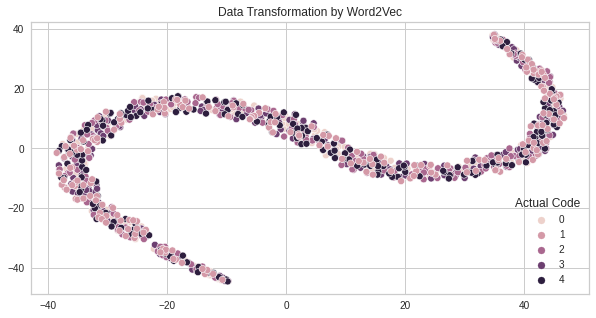

In [ ]:
DrawDataTransform(X_Text2Vec_new_Scaling, 'Data Transformation by Word2Vec')

In [ ]:
X_Text2Vec_new = X_Text2Vec_new.transpose()

##Models

### Kmeans


In [ ]:

# Create function to work out optimum number of clusters
def optimise_k_means(data, max_k) :
  means = []
  inertias = []
  s = []

  for k in range(2, max_k):
    kmeans = KMeans (n_clusters=k , random_state = 42 , init= "k-means++" , max_iter= 300 , n_init= 10 )
    model = kmeans.fit(data)
    means.append(k)
    inertias.append (kmeans.inertia_)
    s.append(silhouette_score(data, kmeans.labels_))

    silhouette_avg = silhouette_score(data, kmeans.labels_)
    print("For n_clusters =", k , "The average silhouette_score is :", silhouette_avg)



#  #Generate the elbow plot
  visualizer = KElbowVisualizer(kmeans, k=(2, max_k) , metric='distortion' , locate_elbow = True)

  visualizer.fit(data)        # Fit the data to the visualizer
  visualizer.show()        # Finalize and render the figure
  
  #Applaying  silhouette 
  plt.plot(range(2, max_k), s)
  plt.xlabel('Number of clusters')
  plt.ylabel('silhouette')
  plt.show()

  return kmeans

In [ ]:
from yellowbrick.cluster import silhouette_visualizer

def toKnow_silhouette (n_clusters , data) : 
  kmeans = KMeans (n_clusters , random_state = 42 , init= "k-means++" , max_iter= 300 , n_init= 10 )
  k_fit = kmeans.fit(data)
  labels = k_fit.predict(data)
  silhouette = silhouette_score(data, kmeans.labels_)
  print (f'silhouette best K at  {silhouette}')
  silhouette_visualizer(KMeans(n_clusters , random_state=42), data , colors='yellowbrick')
  return labels, silhouette

In [ ]:
def Kmean_scatter (data , labels) : 
  # using TSNE to reduce the dimension 
  tsn = TSNE(n_components=2)
  tsn= tsn.fit_transform(data)
  # ploting our data 
  sns.scatterplot(tsn[:,0], tsn[:,1], hue=labels,
                data=mydataset )
 # plt.scatter(tsn[:, 0], tsn[:, 1], marker="o", s = 25 ,  c =labels ,  edgecolor="darkviolet")


#### Applaying Kmean on BOW

For n_clusters = 2 The average silhouette_score is : 0.1323738030297936
For n_clusters = 3 The average silhouette_score is : 0.06637812616380055
For n_clusters = 4 The average silhouette_score is : 0.041286579104121285
For n_clusters = 5 The average silhouette_score is : 0.05027128239892194
For n_clusters = 6 The average silhouette_score is : 0.048192967833504054
For n_clusters = 7 The average silhouette_score is : 0.04973225719541655
For n_clusters = 8 The average silhouette_score is : 0.04674520732938387
For n_clusters = 9 The average silhouette_score is : 0.055427536878161536
For n_clusters = 10 The average silhouette_score is : 0.049210312280807716


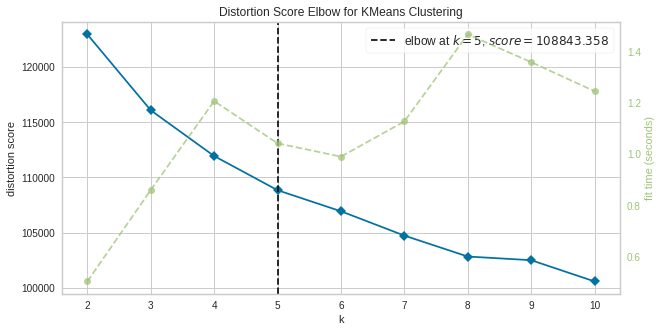

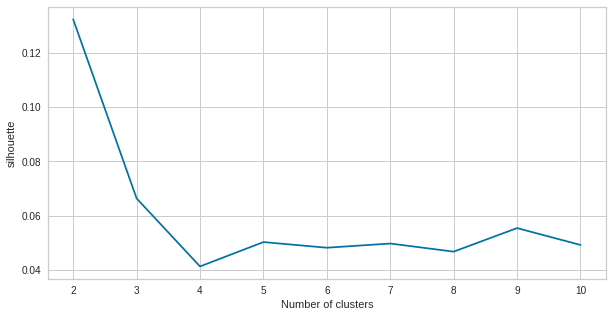

In [ ]:
bow_kmean = optimise_k_means(X_BOW, 11)

In [ ]:
n_bestCluster_Kmeans_BOW = 5

silhouette best K at  0.05027128239892194


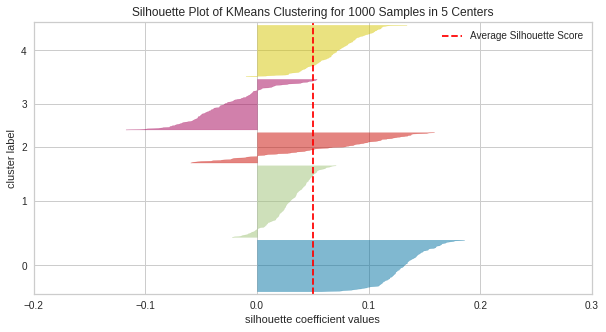

In [ ]:
labels_BOW, silh_Kmeans_BOW = toKnow_silhouette (n_bestCluster_Kmeans_BOW , X_BOW)

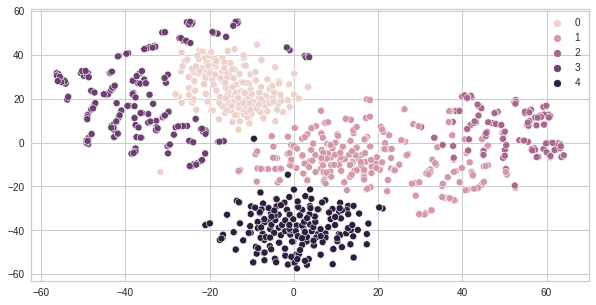

In [ ]:
Kmean_scatter(X_BOW ,labels_BOW)

In [ ]:
kappa_Kmeans_BOW = cohen_kappa_score(labels_BOW, y)
print(f"kappa: {kappa_Kmeans_BOW}")

kappa: -0.14874999999999994


#### Applaying Kmean on TF-IDF

For n_clusters = 2 The average silhouette_score is : 0.04309632414758285
For n_clusters = 3 The average silhouette_score is : 0.08442764242986743
For n_clusters = 4 The average silhouette_score is : 0.09053717698492951
For n_clusters = 5 The average silhouette_score is : 0.02902303691776729
For n_clusters = 6 The average silhouette_score is : 0.034754286660432156
For n_clusters = 7 The average silhouette_score is : 0.025278297786776455
For n_clusters = 8 The average silhouette_score is : 0.03457015297009799
For n_clusters = 9 The average silhouette_score is : 0.035541874436295764
For n_clusters = 10 The average silhouette_score is : 0.04541848784428548


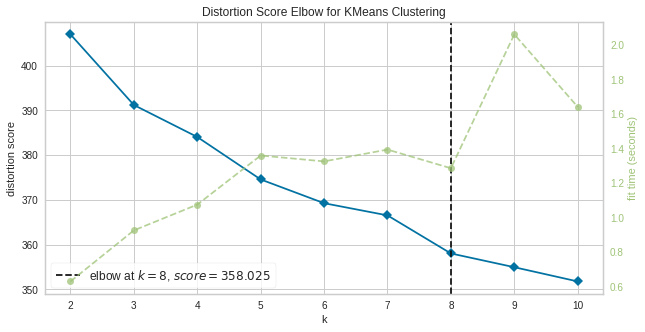

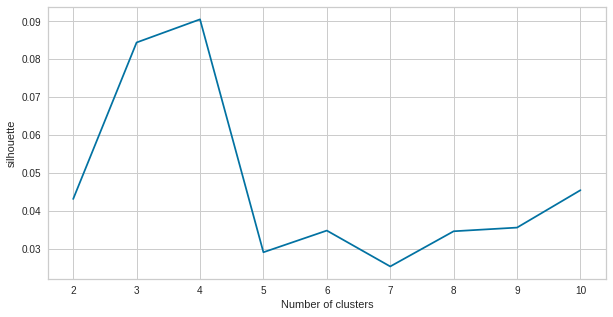

In [ ]:
TFiDF_Kmean = optimise_k_means(X_TFiDF_Vec, 11)

In [ ]:
n_bestCluster_Kmeans_TFiDF =8

silhouette best K at  0.03457015297009799


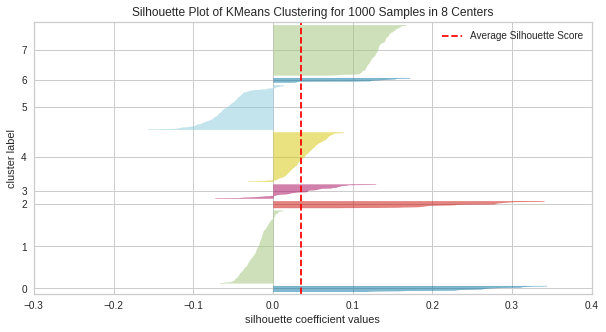

In [ ]:
labels_TFiDF, silh_Kmeans_IFiDF = toKnow_silhouette(n_bestCluster_Kmeans_TFiDF , X_TFiDF_Vec)

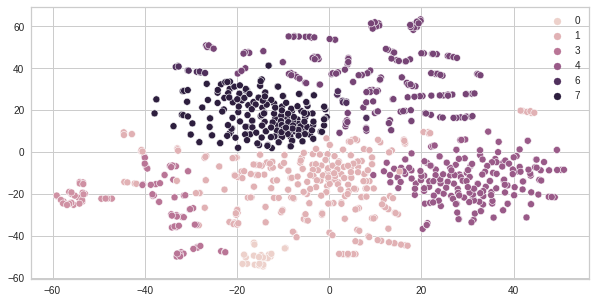

In [ ]:
Kmean_scatter(X_TFiDF_Vec , labels_TFiDF)

In [ ]:
kappa_Kmeans_TFiDF = cohen_kappa_score(labels_TFiDF, y)
print(f"kappa: {kappa_Kmeans_TFiDF}")

kappa: -0.03295454545454546


#### Applaying Kmean on BOW LDA

For n_clusters = 2 The average silhouette_score is : 0.3944806755479702
For n_clusters = 3 The average silhouette_score is : 0.5817413878021643
For n_clusters = 4 The average silhouette_score is : 0.750110704336471
For n_clusters = 5 The average silhouette_score is : 0.9106970812339511
For n_clusters = 6 The average silhouette_score is : 0.8665047030079577
For n_clusters = 7 The average silhouette_score is : 0.8134924249990083
For n_clusters = 8 The average silhouette_score is : 0.7971160490303818
For n_clusters = 9 The average silhouette_score is : 0.7993143122638098
For n_clusters = 10 The average silhouette_score is : 0.7918492701848875


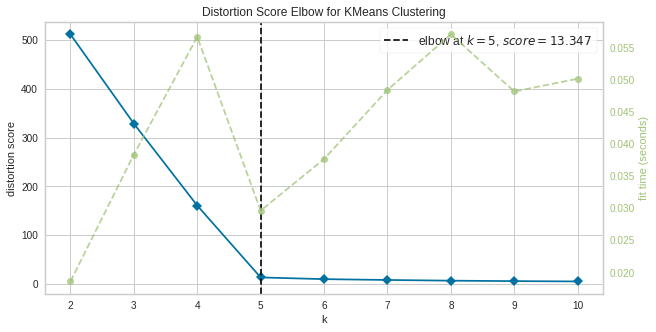

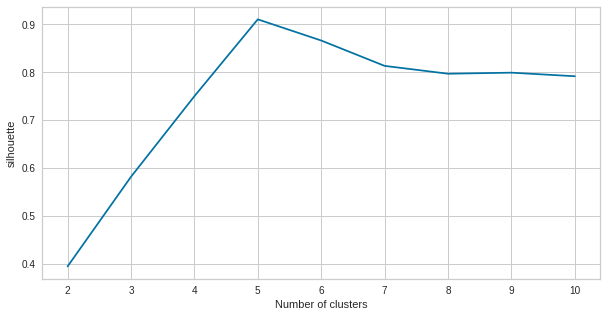

In [ ]:
bow_LDA_kmean = optimise_k_means(X_LDA_Vec_BOW, 11)

In [ ]:
n_bestCluster_Kmeans_LDA_BOW = 5

silhouette best K at  0.9106970812339511


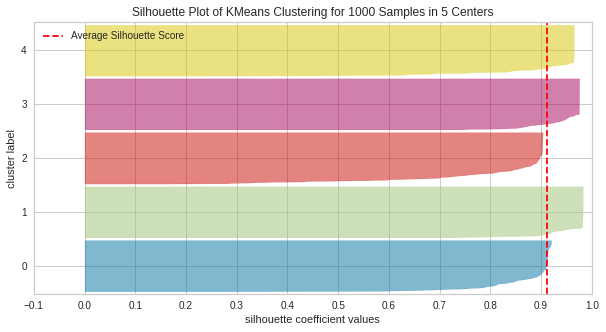

In [ ]:
labels_kmean_LDA_Vec_BOW,silh_Kmeans_LDA_BOW = toKnow_silhouette (n_bestCluster_Kmeans_LDA_BOW , X_LDA_Vec_BOW)

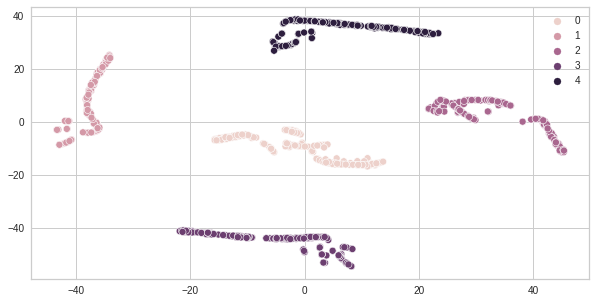

In [ ]:
Kmean_scatter (X_LDA_Vec_BOW , labels_kmean_LDA_Vec_BOW)

In [ ]:
kappa_Kmeans_LDA_BOW= cohen_kappa_score(labels_kmean_LDA_Vec_BOW, y)
print(f"kappa: {kappa_Kmeans_LDA_BOW}")

kappa: 0.25


#### Applaying Kmean on TF-IDF LDA

For n_clusters = 2 The average silhouette_score is : 0.44498025820376175
For n_clusters = 3 The average silhouette_score is : 0.6624085131522006
For n_clusters = 4 The average silhouette_score is : 0.8673328508347292
For n_clusters = 5 The average silhouette_score is : 0.8571208443344636
For n_clusters = 6 The average silhouette_score is : 0.8470742874773066
For n_clusters = 7 The average silhouette_score is : 0.8530455160076854
For n_clusters = 8 The average silhouette_score is : 0.85448520206955
For n_clusters = 9 The average silhouette_score is : 0.8569948138111622
For n_clusters = 10 The average silhouette_score is : 0.8508996532312137


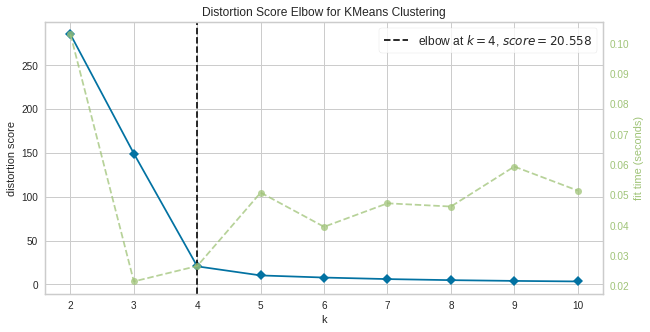

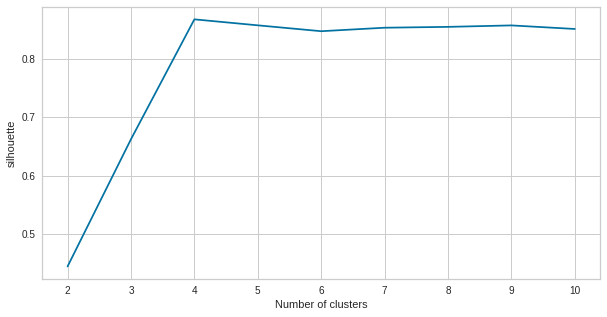

KMeans(n_clusters=10, random_state=42)

In [ ]:
optimise_k_means(X_LDA_Vec_TFiDF ,11)

In [ ]:
n_bestCluster_Kmeans_LDA_IFiDF = 4

silhouette best K at  0.8673328508347292


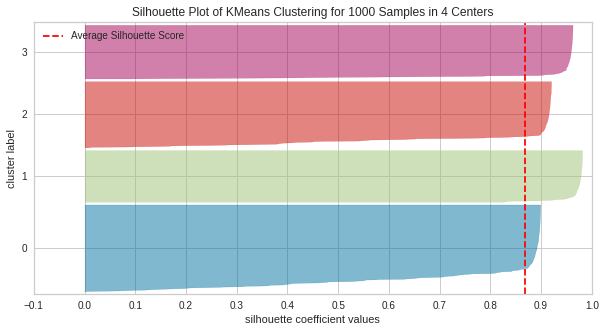

In [ ]:
labels_TFiDF, silh_Kmeans_LDA_TFiDF = toKnow_silhouette (n_bestCluster_Kmeans_LDA_IFiDF , X_LDA_Vec_TFiDF)

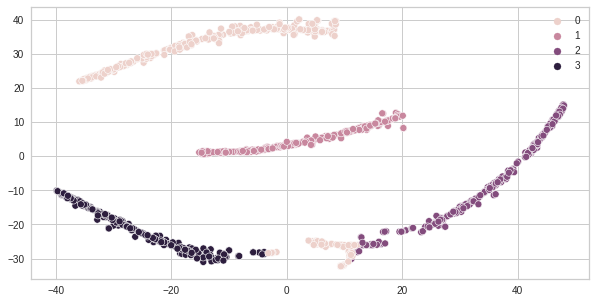

In [ ]:
Kmean_scatter(X_LDA_Vec_TFiDF , labels_TFiDF)

In [ ]:
kappa_Kmeans_LDA_IFiDF = cohen_kappa_score(labels_TFiDF, y)
print(f"kappa: {kappa_Kmeans_LDA_IFiDF}")

kappa: -0.17999999999999994


#### Applaying Kmean on X_Word2Vec

For n_clusters = 2 The average silhouette_score is : 0.5253677
For n_clusters = 3 The average silhouette_score is : 0.48340592
For n_clusters = 4 The average silhouette_score is : 0.446919
For n_clusters = 5 The average silhouette_score is : 0.42204693
For n_clusters = 6 The average silhouette_score is : 0.40839303
For n_clusters = 7 The average silhouette_score is : 0.38578594
For n_clusters = 8 The average silhouette_score is : 0.3587154
For n_clusters = 9 The average silhouette_score is : 0.34341392
For n_clusters = 10 The average silhouette_score is : 0.31744805


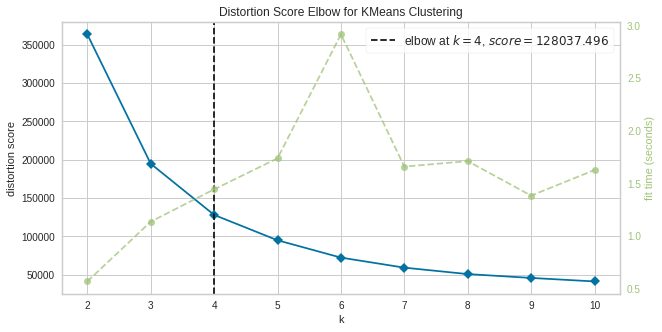

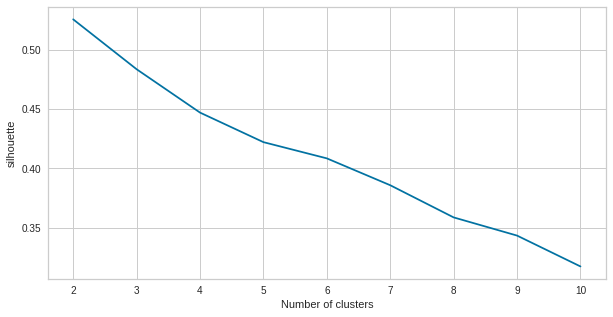

KMeans(n_clusters=10, random_state=42)

In [ ]:
optimise_k_means(X_Text2Vec_new_Scaling, 11)

In [ ]:
n_bestCluster_Kmeans_Word2Vec = 4

silhouette best K at  0.4469189941883087


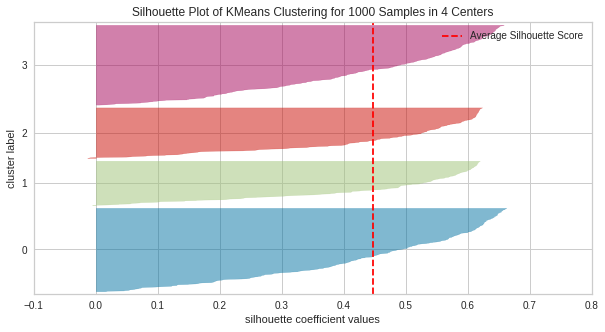

In [ ]:
lables_Word2Vec, silh_Kmeans_Word2Vec = toKnow_silhouette (n_bestCluster_Kmeans_Word2Vec , X_Text2Vec_new_Scaling)

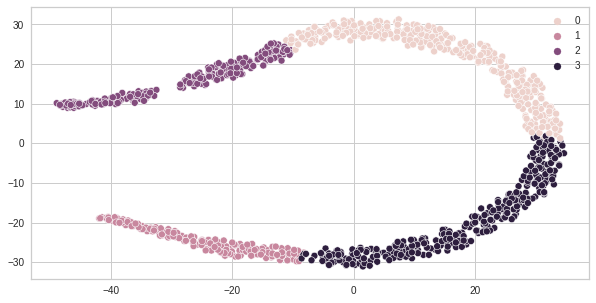

In [ ]:
Kmean_scatter(X_Text2Vec_new_Scaling , lables_Word2Vec)

In [ ]:
kappa_Kmeans_Word2Vec = cohen_kappa_score(lables_Word2Vec, y)
print(f"kappa: {kappa_Kmeans_Word2Vec}")

kappa: -0.016250000000000098


### Expectation maximization (EM)

In [ ]:
def Silhouette_EMfun(X_Vec):
  n_components = np.arange(1, 20)
  models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(X_Vec) for n in n_components]

  s = []
  for i in range(2, 11):
      gmm = GaussianMixture(i, covariance_type='full', random_state=42).fit(X_Vec)
      labels = gmm.predict(X_Vec)
      s.append(silhouette_score(X_Vec, labels))
      
  plt.plot(range(2, 11), s)
  plt.xlabel('Number of clusters')
  plt.ylabel('silhouette')
  plt.show()

In [ ]:
def getbestSilhouetteEM(n_coms, X_Vec):
  gmm = GaussianMixture(n_components=n_coms, random_state=42)
  gmm.fit(X_Vec)

  labels = gmm.predict(X_Vec)
  #print(labels)
  #plt.scatter(X_LDA_Vec[:, 0], X_LDA_Vec[:,1], c=labels, cmap='viridis');

  #gmm.predict_proba(X_LDA_Vec)
  silhouette = silhouette_score(X_Vec, labels)
  print(f'silhouette : {silhouette}')
  return labels, silhouette

In [ ]:
def reduceDimsByTSNE(X_Vec, labels, nameTitle):
  from sklearn.manifold import TSNE
  tsn = TSNE(n_components=2)
  tsn= tsn.fit_transform(X_Vec)
  #plt.scatter(tsn[:,0],tsn[:,1],c=labels,marker='o')
  sns.scatterplot(tsn[:,0], tsn[:,1], hue=labels,
                data=mydataset ).set(title=nameTitle)
  

####EM_X_BOW

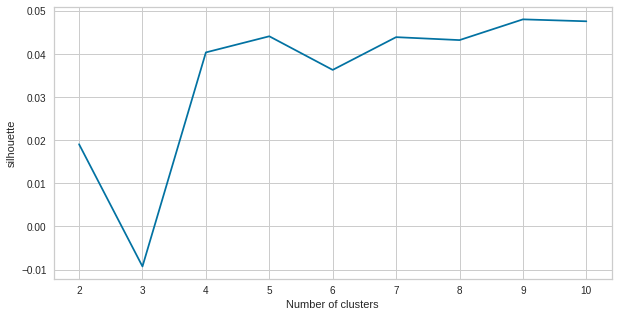

In [ ]:
Silhouette_EMfun(X_BOW)

In [ ]:
n_bestCluster_EM_BOW = 5

In [ ]:
labs_BOW, silh_EM_BOW = getbestSilhouetteEM(n_bestCluster_EM_BOW, X_BOW)

silhouette : 0.04418761397569847


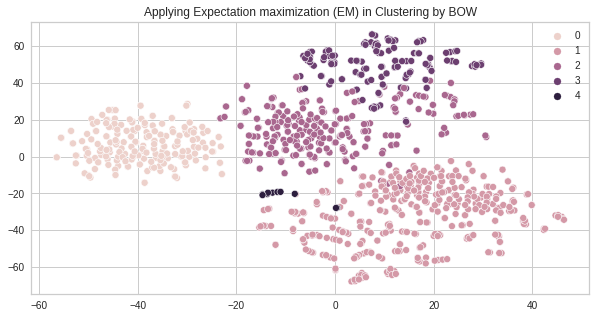

In [ ]:
reduceDimsByTSNE(X_BOW, labs_BOW, "Applying Expectation maximization (EM) in Clustering by BOW")

In [ ]:
kappa_EM_BOW = cohen_kappa_score(labs_BOW, y)
print(f"kappa: {kappa_EM_BOW}")

kappa: 0.26125


####EM_X_TFiDF_Vec

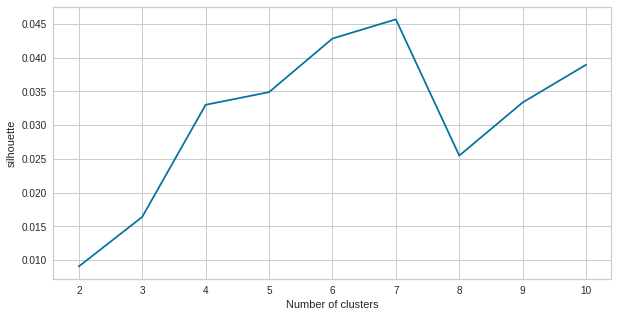

In [ ]:
Silhouette_EMfun(X_TFiDF_Vec)

In [ ]:
n_bestCluster_EM_TFiDF = 7

In [ ]:
labs_TFiDF, silh_EM_IFiDF= getbestSilhouetteEM(n_bestCluster_EM_TFiDF, X_TFiDF_Vec)

silhouette : 0.04565883686655526


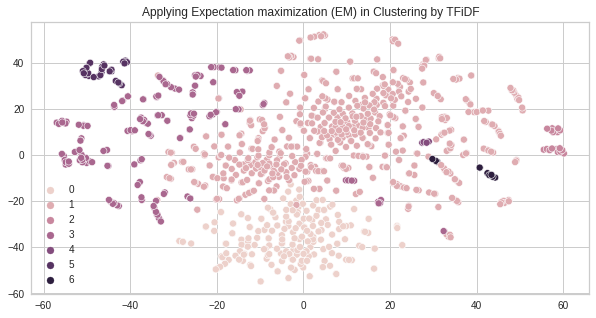

In [ ]:
reduceDimsByTSNE(X_TFiDF_Vec, labs_TFiDF, "Applying Expectation maximization (EM) in Clustering by TFiDF")

In [ ]:
kappa_EM_TFiDF = cohen_kappa_score(labs_TFiDF, y)
print(f"kappa: {kappa_EM_TFiDF}")

kappa: 0.02303120356612187


####EM_X_LDA_Vec_BOW

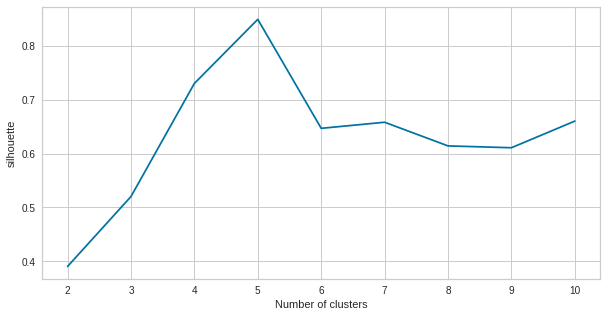

In [ ]:
Silhouette_EMfun(X_LDA_Vec_BOW)

In [ ]:
n_bestCluster_EM_LDA_BOW = 5

In [ ]:
labs_LDA_Vec_BOW, silh_EM_LDA_BOW = getbestSilhouetteEM(n_bestCluster_EM_LDA_BOW, X_LDA_Vec_BOW)

silhouette : 0.8488551357697011


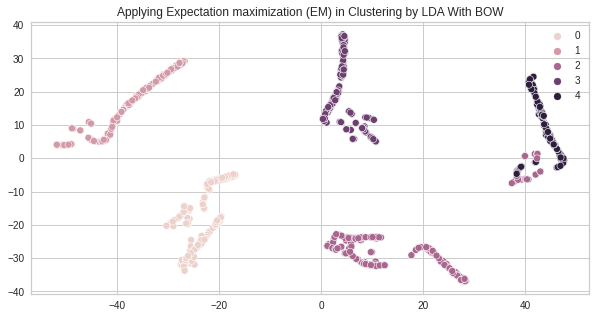

In [ ]:
reduceDimsByTSNE(X_LDA_Vec_BOW, labs_LDA_Vec_BOW,"Applying Expectation maximization (EM) in Clustering by LDA With BOW")

In [ ]:
kappa_EM_LDA_BOW= cohen_kappa_score(labs_LDA_Vec_BOW, y)
print(f"kappa: {kappa_EM_LDA_BOW}")

kappa: 0.25


####EM_X_LDA_Vec_TFiDF

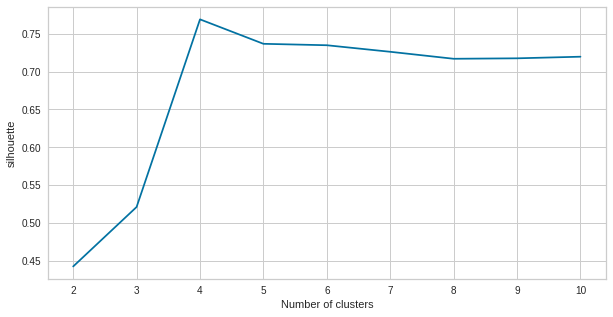

In [ ]:
Silhouette_EMfun(X_LDA_Vec_TFiDF)

In [ ]:
n_bestCluster_EM_LDA_IFiDF = 4

In [ ]:
labs_LDA_TFiDF, silh_EM_LDA_TFiDF = getbestSilhouetteEM(n_bestCluster_EM_LDA_IFiDF, X_LDA_Vec_TFiDF)

silhouette : 0.7691073760466554


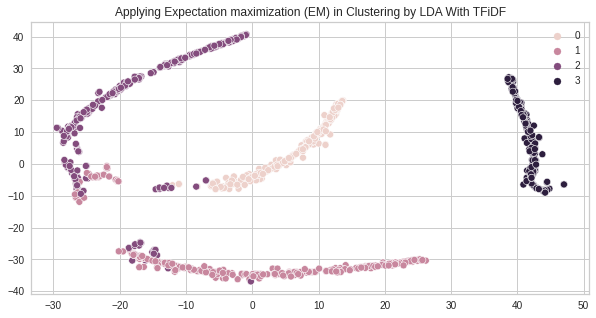

In [ ]:
reduceDimsByTSNE(X_LDA_Vec_TFiDF, labs_LDA_TFiDF,"Applying Expectation maximization (EM) in Clustering by LDA With TFiDF")

In [ ]:
kappa_EM_LDA_IFiDF= cohen_kappa_score(labs_LDA_TFiDF, y)
print(f"kappa: {kappa_EM_LDA_IFiDF}")

kappa: 0.11375000000000002


####EM_X_Word2Vec_new_Scaling

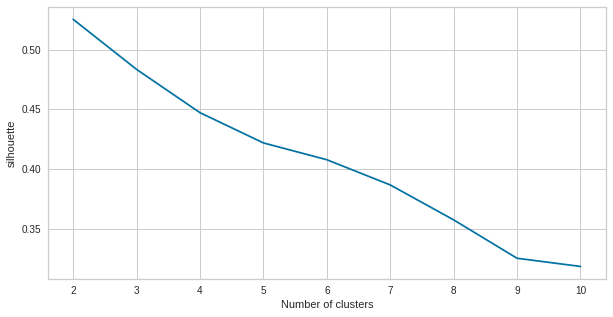

In [ ]:
Silhouette_EMfun(X_Text2Vec_new_Scaling)

In [ ]:
n_bestCluster_EM_Word2Vec = 5

In [ ]:
labs_Word2Vec,silh_EM_Word2Vec  = getbestSilhouetteEM(n_bestCluster_EM_Word2Vec,X_Text2Vec_new_Scaling)

silhouette : 0.421756774187088


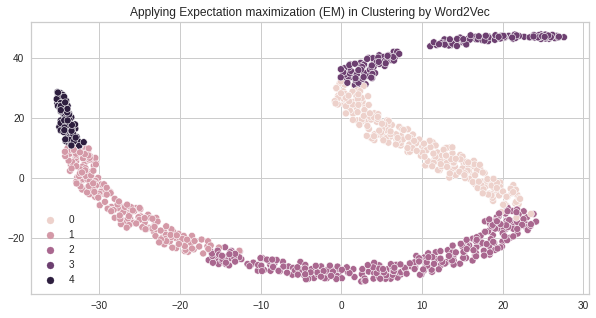

In [ ]:
reduceDimsByTSNE(X_Text2Vec_new_Scaling,labs_Word2Vec, "Applying Expectation maximization (EM) in Clustering by Word2Vec")

In [ ]:
kappa_EM_Word2Vec = cohen_kappa_score(labs_Word2Vec, y)
print(f"kappa: {kappa_EM_Word2Vec}")

kappa: -0.03249999999999997


###hierarchical cluster 

In [ ]:
def dimensionreduction (data):
  #PCA with two principal components
  PCA_2d = PCA(n_components=2).fit(data)
#PCA_2d.head()
  print(PCA_2d.explained_variance_)
  PCA_2d = PCA(n_components=2).fit_transform(data)
  plt.scatter(PCA_2d[:, 0], PCA_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7, edgecolor='k')

In [ ]:
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

def Silhouette_HCfun(data):
  s = []
  for n_clusters in range(2,11):
  
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(data)
    s.append(silhouette_score(data, cluster_labels))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels) 
  #  #Generate the elbow plot
  visualizer = KElbowVisualizer(clusterer, k=(2, 11) , metric='distortion' , locate_elbow = True)

  visualizer.fit(data)        # Fit the data to the visualizer
  visualizer.show()        # Finalize and render the figur
  plt.plot(range(2, 11), s)
  plt.xlabel('Number of clusters')
  plt.ylabel('silhouette')

plt.show()
      
  


####H with Bow

[13.71978896  7.31587747]


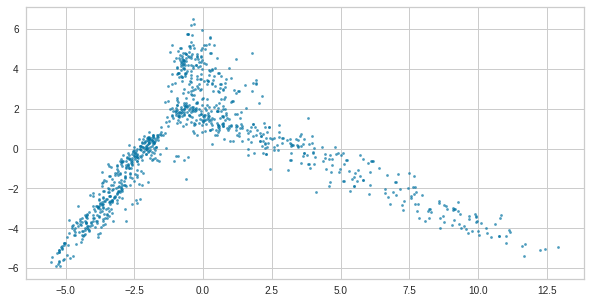

In [ ]:
dimensionreduction(X_BOW)

For n_clusters = 2 The average silhouette_score is : 0.15866895633128406
For n_clusters = 3 The average silhouette_score is : 0.06643590362064727
For n_clusters = 4 The average silhouette_score is : 0.039273708940442145
For n_clusters = 5 The average silhouette_score is : 0.046599535438943886
For n_clusters = 6 The average silhouette_score is : 0.04151148421013291
For n_clusters = 7 The average silhouette_score is : 0.047176564182434724
For n_clusters = 8 The average silhouette_score is : 0.050437777333335446
For n_clusters = 9 The average silhouette_score is : 0.055343936857065894
For n_clusters = 10 The average silhouette_score is : 0.05971271228952116


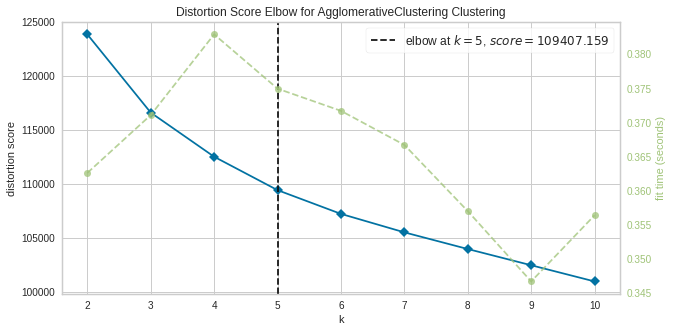

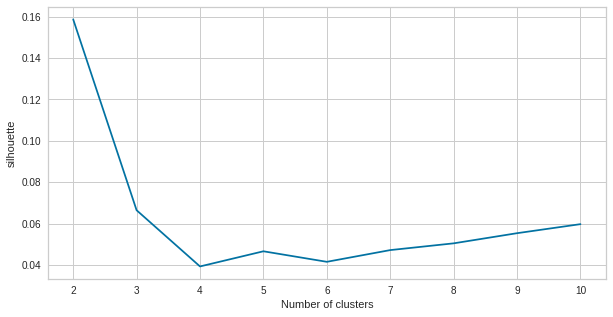

In [ ]:
Silhouette_HCfun(X_BOW)

In [ ]:
n_bestCluster_hc_BOW = 5

"silhouette_score is : 0.046599535438943886


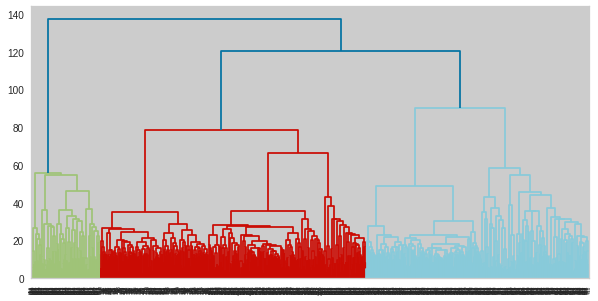

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_BOW, method='ward'))

# create clusters
hc = AgglomerativeClustering(n_clusters=n_bestCluster_hc_BOW, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc_BOW = hc.fit_predict(X_BOW)

silh_hc_BOW = silhouette_score(X_BOW, y_hc_BOW)
print(f'"silhouette_score is : {silh_hc_BOW}')

In [ ]:
np.unique(y_hc_BOW, return_counts=True)

(array([0, 1, 2, 3, 4]), array([283, 124, 194, 206, 193]))

In [ ]:
kappa_hc_BOW = cohen_kappa_score(y_hc_BOW, y)
print(f"kappa: {kappa_hc_BOW}")

kappa: 0.16500000000000004


####H with TFIDF

[0.02365882 0.01623909]


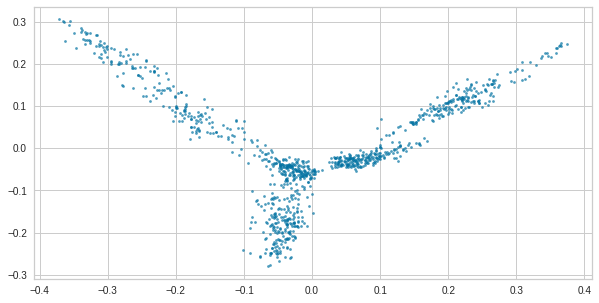

In [ ]:
dimensionreduction(X_TFiDF_Vec)

For n_clusters = 2 The average silhouette_score is : 0.0994963832728562
For n_clusters = 3 The average silhouette_score is : 0.08139686666731757
For n_clusters = 4 The average silhouette_score is : 0.01927141761861875
For n_clusters = 5 The average silhouette_score is : 0.009101909264157364
For n_clusters = 6 The average silhouette_score is : 0.016390364074212356
For n_clusters = 7 The average silhouette_score is : 0.02236285891195139
For n_clusters = 8 The average silhouette_score is : 0.028724613899336674
For n_clusters = 9 The average silhouette_score is : 0.033602159772748115
For n_clusters = 10 The average silhouette_score is : 0.03789403833611998


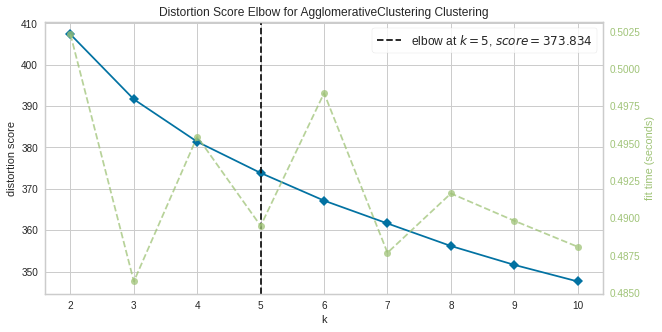

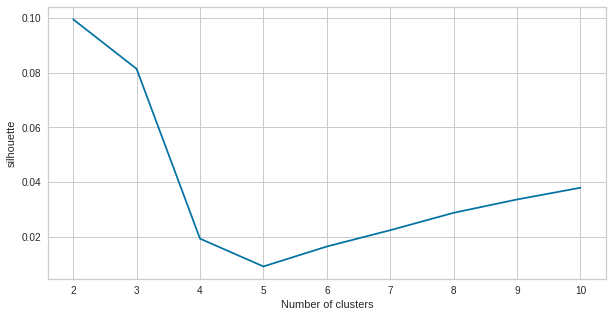

In [ ]:
Silhouette_HCfun(X_TFiDF_Vec)

In [ ]:
n_bestCluster_hc_TFiDF = 5

"silhouette_score is : 0.009101909264157364


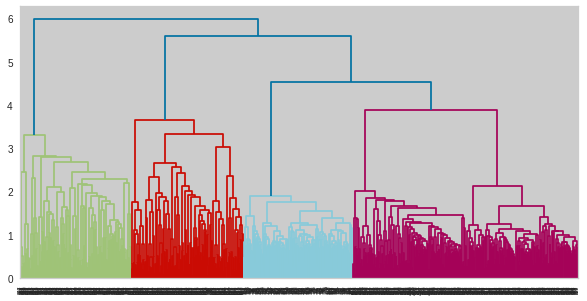

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_TFiDF_Vec, method='ward'))

# create clusters
hc = AgglomerativeClustering(n_clusters=n_bestCluster_hc_TFiDF, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc_TFiDF = hc.fit_predict(X_TFiDF_Vec)
silh_hc_IFiDF = silhouette_score(X_TFiDF_Vec, y_hc_TFiDF)
print(f'"silhouette_score is : {silh_hc_IFiDF}')

In [ ]:
np.unique(y_hc_TFiDF, return_counts=True)

(array([0, 1, 2, 3, 4]), array([201, 200, 200, 196, 203]))

In [ ]:
kappa_hc_TFiDF = cohen_kappa_score(y_hc_TFiDF, y)
print(f"kappa: {kappa_hc_TFiDF}")

kappa: -0.2450000000000001


####H with LDA_BOW

[0.18777789 0.18555974]


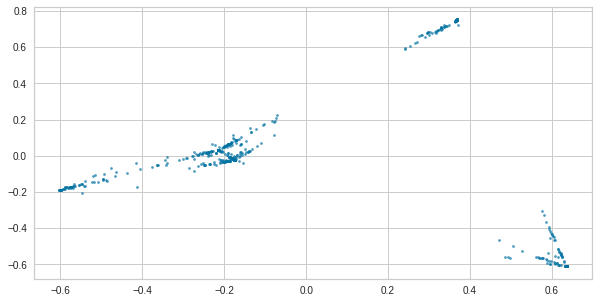

In [ ]:
dimensionreduction(X_LDA_Vec_BOW)

For n_clusters = 2 The average silhouette_score is : 0.3944806755479702
For n_clusters = 3 The average silhouette_score is : 0.5817413878021643
For n_clusters = 4 The average silhouette_score is : 0.750110704336471
For n_clusters = 5 The average silhouette_score is : 0.9106970812339511
For n_clusters = 6 The average silhouette_score is : 0.8604474836830458
For n_clusters = 7 The average silhouette_score is : 0.8012346885197351
For n_clusters = 8 The average silhouette_score is : 0.7864020125580111
For n_clusters = 9 The average silhouette_score is : 0.78576426101291
For n_clusters = 10 The average silhouette_score is : 0.7875083579751528


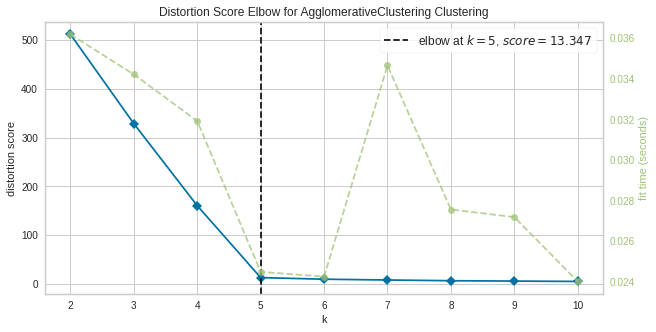

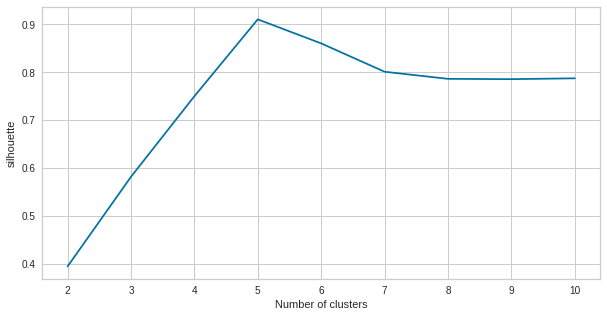

In [ ]:
Silhouette_HCfun(X_LDA_Vec_BOW)

In [ ]:
n_bestCluster_hc_LDA_BOW = 5

"silhouette_score is : 0.9106970812339511


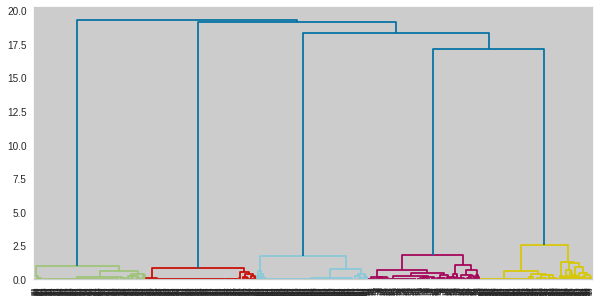

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_LDA_Vec_BOW, method='ward'))

# create clusters
hc = AgglomerativeClustering(n_clusters=n_bestCluster_hc_LDA_BOW, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc_LDA_Vec_BOW = hc.fit_predict(X_LDA_Vec_BOW)

silh_hc_LDA_BOW = silhouette_score(X_LDA_Vec_BOW, y_hc_LDA_Vec_BOW)
print(f'"silhouette_score is : {silh_hc_LDA_BOW}')

In [ ]:
np.unique(y_hc_LDA_Vec_BOW, return_counts=True)

(array([0, 1, 2, 3, 4]), array([201, 200, 200, 200, 199]))

In [ ]:
kappa_hc_LDA_BOW = cohen_kappa_score(y_hc_LDA_Vec_BOW, y)
print(f"kappa: {kappa_hc_LDA_BOW}")

kappa: -0.25


####H with LDA_TFIDF

[0.1546219  0.14280706]


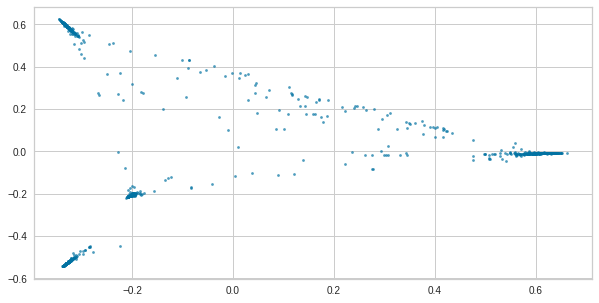

In [ ]:
dimensionreduction(X_LDA_Vec_TFiDF)

For n_clusters = 2 The average silhouette_score is : 0.4627344691352979
For n_clusters = 3 The average silhouette_score is : 0.6587246729774663
For n_clusters = 4 The average silhouette_score is : 0.8342889098771163
For n_clusters = 5 The average silhouette_score is : 0.8426680846639687
For n_clusters = 6 The average silhouette_score is : 0.8398227639053918
For n_clusters = 7 The average silhouette_score is : 0.8482309492589816
For n_clusters = 8 The average silhouette_score is : 0.8507207639093265
For n_clusters = 9 The average silhouette_score is : 0.8418144856378025
For n_clusters = 10 The average silhouette_score is : 0.8468194656087428


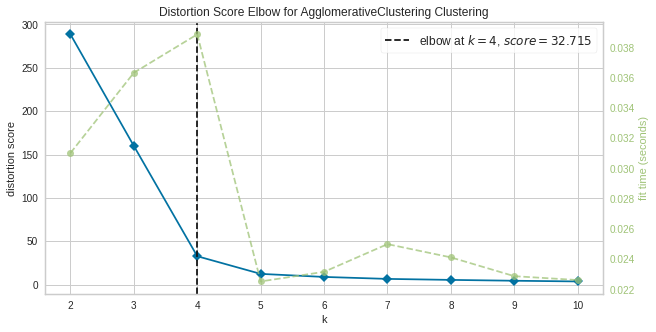

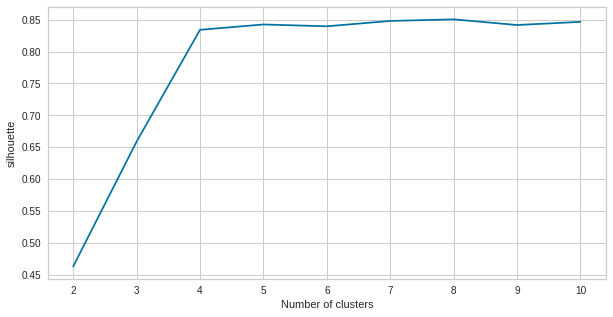

In [ ]:
Silhouette_HCfun(X_LDA_Vec_TFiDF)

In [ ]:
n_bestCluster_hc_LDA_IFiDF = 4

"silhouette_score is : 0.8342889098771163


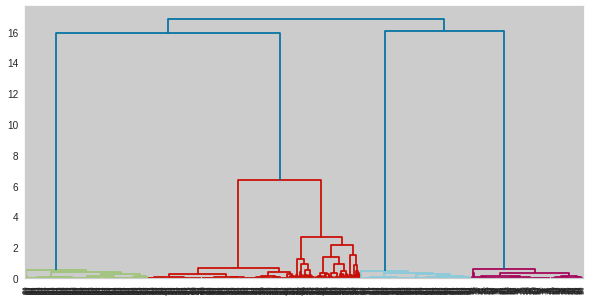

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_LDA_Vec_TFiDF, method='ward'))

# create clusters
hc = AgglomerativeClustering(n_clusters=n_bestCluster_hc_LDA_IFiDF, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc_LDA_Vec_TFiDF = hc.fit_predict(X_LDA_Vec_TFiDF)
silh_hc_LDA_TFiDF = silhouette_score(X_LDA_Vec_TFiDF, y_hc_LDA_Vec_TFiDF)
print(f'"silhouette_score is : {silh_hc_LDA_TFiDF}')

In [ ]:
np.unique(y_hc_LDA_Vec_TFiDF, return_counts=True)

(array([0, 1, 2, 3]), array([381, 200, 200, 219]))

In [ ]:
kappa_hc_LDA_IFiDF = cohen_kappa_score(y_hc_LDA_Vec_TFiDF, y)
print(f"kappa: {kappa_hc_LDA_IFiDF}")

kappa: -0.25


####H with ًWord2Vec

[978.7626     1.087491]


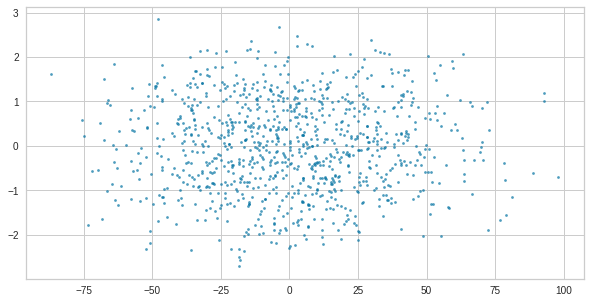

In [ ]:
dimensionreduction(X_Text2Vec_new_Scaling)

For n_clusters = 2 The average silhouette_score is : 0.51545924
For n_clusters = 3 The average silhouette_score is : 0.47239295
For n_clusters = 4 The average silhouette_score is : 0.4452574
For n_clusters = 5 The average silhouette_score is : 0.3849801
For n_clusters = 6 The average silhouette_score is : 0.38101
For n_clusters = 7 The average silhouette_score is : 0.37134388
For n_clusters = 8 The average silhouette_score is : 0.36309132
For n_clusters = 9 The average silhouette_score is : 0.30589318
For n_clusters = 10 The average silhouette_score is : 0.3002851


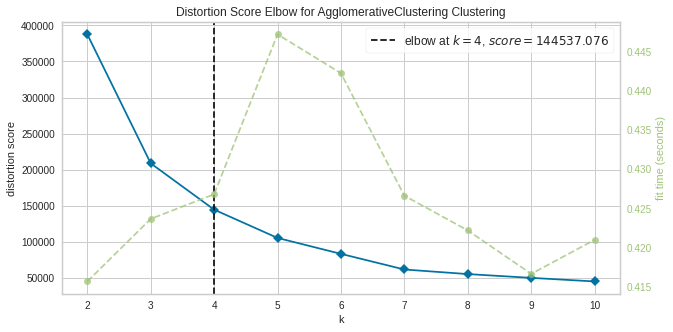

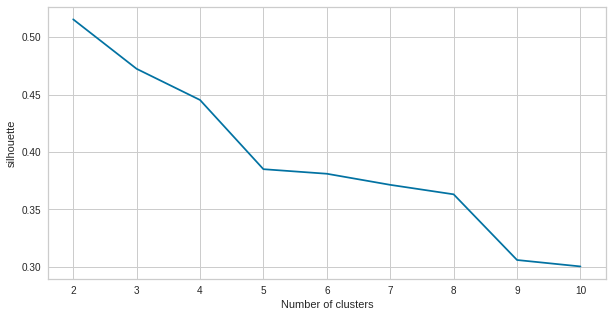

In [ ]:
Silhouette_HCfun(X_Text2Vec_new_Scaling)

In [ ]:
n_bestCluster_hc_Word2Vec = 4

"silhouette_score is : 0.44525739550590515


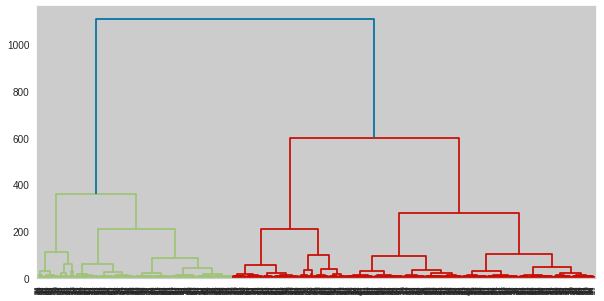

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_Text2Vec_new_Scaling, method='ward'))

# create clusters
hc = AgglomerativeClustering(n_clusters=n_bestCluster_hc_Word2Vec, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc_Text2Vec = hc.fit_predict(X_Text2Vec_new_Scaling)
silh_hc_Word2Vec = silhouette_score(X_Text2Vec_new_Scaling, y_hc_Text2Vec)
print(f'"silhouette_score is : {silh_hc_Word2Vec}')

In [ ]:
np.unique(y_hc_Text2Vec, return_counts=True)

(array([0, 1, 2, 3]), array([447, 284, 202,  67]))

In [ ]:
kappa_hc_Word2Vec = cohen_kappa_score(y_hc_Text2Vec, y)
print(f"kappa: {kappa_hc_Word2Vec}")

kappa: -0.008750000000000036


## Display silhouette and kappa for All models to choose the champion model.

In [ ]:
print(f"1- Expectation maximization(Em) With BOW by N_clusters= {n_bestCluster_EM_BOW}")
print(f'silhouette: {silh_EM_BOW}, kappa: {kappa_EM_BOW}')
print(f"2- Expectation maximization(Em) With TFiDF by N_clusters= {n_bestCluster_EM_TFiDF}")
print(f'silhouette: {silh_EM_IFiDF}, kappa: {kappa_EM_TFiDF}')
print(f"3- Expectation maximization(Em) With LDA-BOW by N_clusters= {n_bestCluster_EM_LDA_BOW}")
print(f'silhouette: {silh_EM_LDA_BOW}, kappa: {kappa_EM_LDA_BOW}')
print(f"4- Expectation maximization(Em) With LDA-IFiDF by N_clusters= {n_bestCluster_EM_LDA_IFiDF}")
print(f'silhouette: {silh_EM_LDA_TFiDF}, kappa: {kappa_EM_LDA_IFiDF}')
print(f"5- Expectation maximization(Em) With Word2Vec by N_clusters= {n_bestCluster_EM_Word2Vec}")
print(f'silhouette: {silh_EM_Word2Vec}, kappa: {kappa_EM_Word2Vec}')
print("------------------------------------------------------------------")
print(f"1- Kmeans With BOW by N_clusters= {n_bestCluster_Kmeans_BOW}")
print(f'silhouette: {silh_Kmeans_BOW}, kappa: {kappa_Kmeans_BOW}')
print(f"2- Kmeans With TFiDF by N_clusters= {n_bestCluster_Kmeans_TFiDF}")
print(f'silhouette: {silh_Kmeans_IFiDF}, kappa: {kappa_Kmeans_TFiDF}')
print(f"3- Kmeans With LDA-BOW by N_clusters= {n_bestCluster_Kmeans_LDA_BOW}")
print(f'silhouette: {silh_Kmeans_LDA_BOW}, kappa: {kappa_Kmeans_LDA_BOW}')
print(f"4- Kmeans With LDA-IFiDF by N_clusters= {n_bestCluster_Kmeans_LDA_IFiDF}")
print(f'silhouette: {silh_Kmeans_LDA_TFiDF}, kappa: {kappa_Kmeans_LDA_IFiDF}')
print(f"5- Kmeans With Word2Vec by N_clusters= {n_bestCluster_Kmeans_Word2Vec}")
print(f'silhouette: {silh_Kmeans_Word2Vec}, kappa: {kappa_Kmeans_Word2Vec}')
print("------------------------------------------------------------------")
print(f"1- hierarchical cluster With BOW by N_clusters= {n_bestCluster_hc_BOW}")
print(f'silhouette: {silh_hc_BOW}, kappa: {kappa_hc_BOW}')
print(f"2- hierarchical cluster With TFiDF by N_clusters= {n_bestCluster_hc_TFiDF}")
print(f'silhouette: {silh_hc_IFiDF}, kappa: {kappa_hc_TFiDF}')
print(f"3- hierarchical cluster With LDA-BOW by N_clusters= {n_bestCluster_hc_LDA_BOW}")
print(f'silhouette: {silh_hc_LDA_BOW}, kappa: {kappa_hc_LDA_BOW}')
print(f"4- hierarchical cluster With LDA-IFiDF by N_clusters= {n_bestCluster_hc_LDA_IFiDF}")
print(f'silhouette: {silh_hc_LDA_TFiDF}, kappa: {kappa_hc_LDA_IFiDF}')
print(f"5- hierarchical cluster With Word2Vec by N_clusters= {n_bestCluster_hc_Word2Vec}")
print(f'silhouette: {silh_hc_Word2Vec}, kappa: {kappa_hc_Word2Vec}')


1- Expectation maximization(Em) With BOW by N_clusters= 5
silhouette: 0.04418761397569847, kappa: 0.26125
2- Expectation maximization(Em) With TFiDF by N_clusters= 7
silhouette: 0.04565883686655526, kappa: 0.02303120356612187
3- Expectation maximization(Em) With LDA-BOW by N_clusters= 5
silhouette: 0.8488551357697011, kappa: 0.25
4- Expectation maximization(Em) With LDA-IFiDF by N_clusters= 4
silhouette: 0.7691073760466554, kappa: 0.11375000000000002
5- Expectation maximization(Em) With Word2Vec by N_clusters= 5
silhouette: 0.421756774187088, kappa: -0.03249999999999997
------------------------------------------------------------------
1- Kmeans With BOW by N_clusters= 5
silhouette: 0.05027128239892194, kappa: -0.14874999999999994
2- Kmeans With TFiDF by N_clusters= 8
silhouette: 0.03457015297009799, kappa: -0.03295454545454546
3- Kmeans With LDA-BOW by N_clusters= 5
silhouette: 0.9106970812339511, kappa: 0.25
4- Kmeans With LDA-IFiDF by N_clusters= 4
silhouette: 0.8673328508347292, ka

##Error-Analysis on Kmeans With LDA-BOW

In [ ]:
print(f"Kmeans With LDA-BOW by N_clusters= {n_bestCluster_Kmeans_LDA_BOW}")
print(f'silhouette: {silh_Kmeans_LDA_BOW}, kappa: {kappa_Kmeans_LDA_BOW}')

Kmeans With LDA-BOW by N_clusters= 5
silhouette: 0.9106970812339511, kappa: 0.25


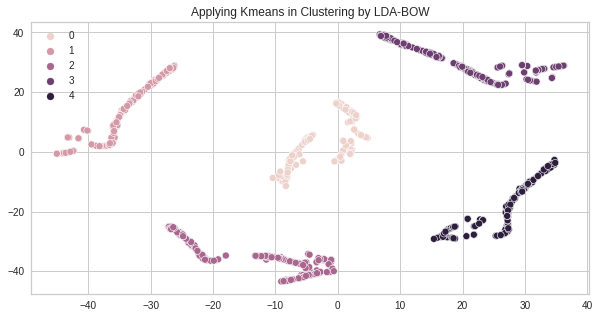

In [ ]:
reduceDimsByTSNE(X_LDA_Vec_BOW, labels_kmean_LDA_Vec_BOW, "Applying Kmeans in Clustering by LDA-BOW")

In [ ]:
lst_act = y.reshape(5,200)
from collections import Counter
lst_y = []
for i in range(5):
  res = Counter(lst_act[i])
  lst_y.append(res)

In [ ]:
# actual class
lst_y

[Counter({0: 200}),
 Counter({3: 200}),
 Counter({2: 200}),
 Counter({4: 200}),
 Counter({1: 200})]

In [ ]:
lst_pred = labels_kmean_LDA_Vec_BOW.reshape(5,200)
from collections import Counter
lst_res_pred = []
for i in range(5):
  res = Counter(lst_pred[i])
  lst_res_pred.append(res)

In [ ]:
## predicted class
lst_res_pred

[Counter({0: 200}),
 Counter({1: 200}),
 Counter({2: 200}),
 Counter({3: 200}),
 Counter({2: 1, 4: 199})]

In [ ]:
lst_pred = lst_pred.reshape(-1,1)

In [ ]:
# words of Topic 0
words_topic0 = []
s1=""
for t in allSentences[:200]:
  s1 = s1 + t
words_topic0 = s1.split()

In [ ]:
# words of Topic 1
words_topic1 = []
s1=""
for t in allSentences[200:400]:
  s1 = s1 + t
words_topic1 = s1.split()

In [ ]:
# words of Topic 2
words_topic2 = []
s1=""
for t in allSentences[400:600]:
  s1 = s1 + t
words_topic2 = s1.split()

In [ ]:
# words of Topic 3
words_topic3 = []
s1=""
for t in allSentences[600:800]:
  s1 = s1 + t
words_topic3 = s1.split()

In [ ]:
# words of Topic 4
words_topic4 = []
s1=""
for t in allSentences[800:1000]:
  s1 = s1 + t
words_topic4 = s1.split()

In [ ]:
# the frequent words in topic 1 and topic 3
frequentwords_Topic1_3 = []
for t1 in words_topic1:
  #print(words_topic1[t1])
  for t3 in words_topic3:
    #print(type(words_topic2[t2]))
    if t3== t1:
      frequentwords_Topic1_3.append(t3)

In [ ]:
# getting the count frequent words in its topic
def numofTop10(words_Topic10, words_topic):
  lst_word = []
  lst_num_word = []
  for top10 in words_Topic10:
    count_T1 =0
    lst_word.append(top10)
    for t1 in words_topic:
      if top10 == t1:
        count_T1 += 1
    lst_num_word.append(count_T1)
  return lst_word, lst_num_word


In [ ]:
# removing the repeated words in list.
def unique(list1):
  
    # initialize a null list
    unique_list = []
      
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    return unique_list[:10]

In [ ]:
# the first 10 frequent words in the first and the third topic.
frequentwords_Topic1_3_unq = unique(frequentwords_Topic1_3)
frequentwords_Topic1_3_unq

['no',
 'need',
 'thou',
 'already',
 'and',
 'number',
 'though',
 'one',
 'but',
 'man']

In [ ]:
# getting the count frequent words in Topic 1
lst1,lstcount1 = numofTop10(frequentwords_Topic1_3_unq,words_topic1)

In [ ]:
# classifying the frequent words between Topic 1 or Topic 3
lst3,lstcount3 = numofTop10(frequentwords_Topic1_3_unq,words_topic3)

In [ ]:
# Classifying the word according to number of word in its Topic
lstBestTopWord = []
for i in range(0, 10):
  if lstcount1[i] > lstcount3[i]:
    lstBestTopWord.append("Topic1")
  else:
    lstBestTopWord.append("Topic3")

In [ ]:
# The table analysis for words repetition in the first and the third Topic and identifying where the word belong to in each topic
WordDf = pd.DataFrame()
WordDf["Top10 words of topic1"] = lst1
WordDf["Top10 words of topic3"] = lst3
WordDf["The number per word of topic1"] = lstcount1
WordDf["The number per word of topic3"] = lstcount3
WordDf["The best selected word for topic"] = lstBestTopWord
WordDf

,Top10 words of topic1,Top10 words of topic3,The number per word of topic1,The number per word of topic3,The best selected word for topic
0,no,no,20,54,Topic3
1,need,need,20,5,Topic1
2,thou,thou,257,267,Topic3
3,already,already,1,10,Topic3
4,and,and,332,541,Topic3
5,number,number,8,5,Topic1
6,though,though,130,14,Topic1
7,one,one,96,83,Topic1
8,but,but,127,164,Topic3
9,man,man,87,155,Topic3
